<a href="https://colab.research.google.com/github/GiselaCS/Mujeres_Digitales/blob/main/Estadistica_Descriptiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nominal: Consiste en clasificar objetos o fenómenos, según ciertas características, tipologías o nombres, dándoles una denominación o símbolo, sin que implique ninguna relación de orden, distancia o proporción entre los objetos o fenómeno.

Ejemplo Cuando un producto se rotula de acuerdo al cumplimiento de las especificaciones de diseño como "conforme y no conforme". o "crítico, grave, y menor". No se obtienen valores numéricos y no se puede realizar un orden de las observaciones con sentido.

Ordinal Llamada también escala de orden jerárquico, con ella se establecen posiciones relativas de los objetos o fenómenos en estudio, respecto a alguna característica de interés, sin que se reflejen distancias entre ellos. Puede suceder que los objetos de una categoría de las escala no sean precisamente diferentes a los objetos de otra categoría de la escala, sino que están relacionados entre si.

Ejemplo Suponga que a los clientes en un almacen se les hace unas preguntas para valorar la calidad del servicio. Los clientes valoran la calidad de acuerdo a las siguientes respuestas: 1 (excelente), 2 (bueno), 3 (regular), 3 (malo) 4 (pésimo).

Intervalo Representa un nivel de medición más preciso, matemáticamente hablando, que las anteriores; no solo se establece un orden en las posiciones relativas de los objetos o individuos, sino que se mide también la distancia entre los intervalos o las diferentes categorías o clases.

Ejemplo Suponga que se está interesado en la temperatura del fundido de acero. Se toman cuatro lecturas cada dos horas: 2050, 2100, 2150, 2200 y 2250 F. Obviamente los datos pueden ser ordenados (semejante a los datos ordinales) en orden ascendente de temperatura indicando temperatura más fria, menos fria, y asi sucesivamente.

Razon Cuando una escala tiene todas las características de una escala de intervalo y además un punto cero real en su origen, se llama escala de razón. Además de distinción, orden y distancia, ésta es una escala que permite establecer en que proporción es mayor una categoría de una escala que otra. El cero absoluto o natural representa la nulidad de lo que se estudia.

Ejemplo Suponga que el peso de cuatro piezas fundidas de metal son 2.0, 2.1, 2.3 y 2.5 kg. El orden(ordinal) y la diferencia (intervalo) en los pesos puede ser comparado. Así, el incremento de peso de 2.0 a 2.1 es de 0.1 kg, el cual es el mismo que el que existe entre 2.3 y 2.4 kg

# 1) Presentacion de datos


---


# a) Diagrama de Puntos

Es una gráfica muy útil para visualizar un conjunto pequeño de datos; por ejemplo, de unas 20 observaciones. La gráfica permite ver rápidamente la tendencia y variabilidad de los datos. Para su elaboración dibuje una línea horizantal demarcada con los valores encontrados en los datos, luego coloque tantos circulos pequeños rellenos (o esfera) encima uno de otro sobre el número del eje correspondiente al dato.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
ratings = pd.read_csv('ratings.csv', encoding='iso8859')
ratings.head()

,Const,Your Rating,Date Rated,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
0,tt0100050,5,2018-10-31,Look Who's Talking Too,https://www.imdb.com/title/tt0100050/,movie,4.6,81.0,1990,"Comedy, Family, Romance",41915.0,1990-12-14,Amy Heckerling
1,tt1000774,5,2018-09-24,Sex and the City,https://www.imdb.com/title/tt1000774/,movie,5.6,145.0,2008,"Comedy, Drama, Romance",110501.0,2008-05-12,Michael Patrick King
2,tt1001526,8,2018-09-25,Megamind,https://www.imdb.com/title/tt1001526/,movie,7.3,95.0,2010,"Animation, Action, Comedy, Family, Sci-Fi",208584.0,2010-10-28,Tom McGrath
3,tt0100157,7,2018-09-25,Misery,https://www.imdb.com/title/tt0100157/,movie,7.8,107.0,1990,"Drama, Thriller",165090.0,1990-11-29,Rob Reiner
4,tt0100263,7,2018-11-01,Nikita,https://www.imdb.com/title/tt0100263/,movie,7.3,117.0,1990,"Action, Thriller",62995.0,1990-02-21,Luc Besson


In [ ]:
# Crear un loop para contar
movie_count = []

for index, year in enumerate(ratings['Year']):
  subset = ratings.iloc[:index+1]
  count = len(subset[subset['Year'] == year])   # Contar todas las peliculas para el mismo año en este subconjunto
  movie_count.append(count)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


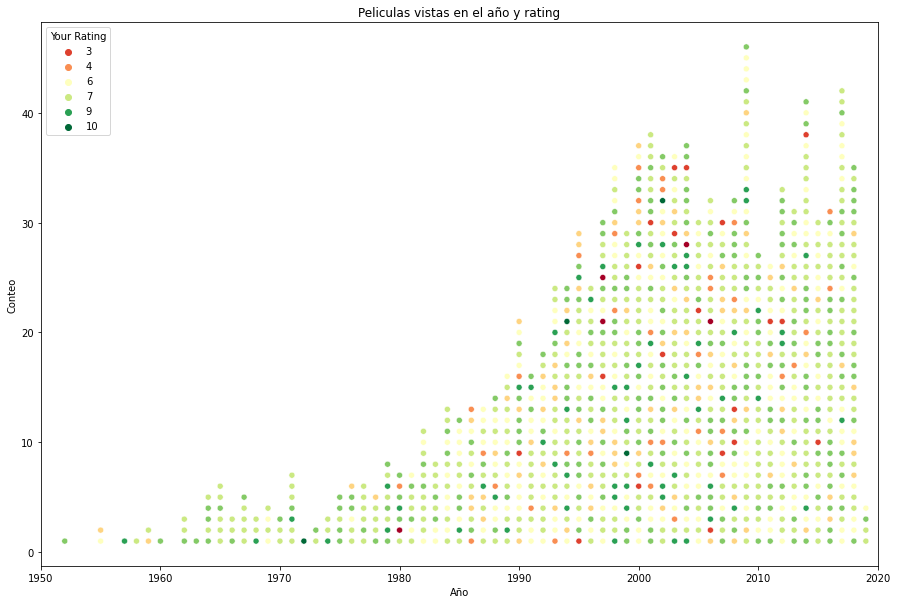

In [ ]:
# Data para el plot 
x = ratings['Year']
y = movie_count
hue1 = ratings['Your Rating']

# Dot plot created using scatter plot
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x, y, hue=hue1, palette="RdYlGn")
plt.xlim([1950, 2020])
plt.ylabel("Conteo")
plt.xlabel("Año")
plt.title("Peliculas vistas en el año y rating")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


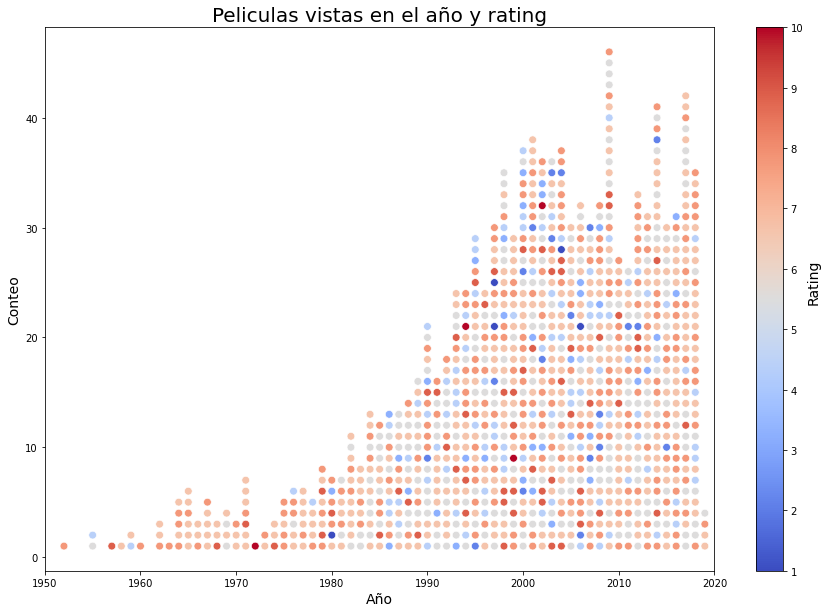

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x, y, hue=hue1, s=60, legend="full", palette="coolwarm")
ax.grid(False)  # Remover la grilla
ax.get_legend().remove()  # Borrar la leyenda
scale_legend = plt.Normalize(hue1.min() - 1, hue1.max())  # Crear la escala para el colormap.
# hue.min-1 porque no considero el 1/10
color_map = plt.cm.ScalarMappable(cmap="coolwarm", norm=scale_legend)  # Colormap 
color_map.set_array([])  # Dummy variable para crear el colormap.
ax.figure.colorbar(color_map)  # Agregar el colormap como leyenda.
plt.xlim([1950, 2020])  # Especificar limite de tiempo
plt.ylabel("Conteo", size=14)
plt.xlabel("Año", size=14)
plt.title("Peliculas vistas en el año y rating", size=20)
plt.gcf().text(0.83, 0.5, "Rating", fontsize=14, rotation=90)  # Label para el colormap.
plt.show()

In [ ]:
df=pd.DataFrame()
df['x']=x;df['y']=y;df['hue']=hue1
df

,x,y,hue
0,1990,1,5
1,2008,1,5
2,2010,1,8
3,1990,2,7
4,1990,3,7
...,...,...,...
1100,1990,17,6
1101,1990,18,7
1102,1990,19,8
1103,1990,20,6


In [ ]:
import plotly.express as px
df=pd.DataFrame()
df['x']=x;df['y']=y;df['hue']=hue1;
fig = px.scatter(df, x="x", y="y", color="hue",
                 title="Peliculas por rating y año",labels={
                     "x": "Año",
                     "y": "Conteo",
                     "hue": "Rating"
                 }
                )
fig.show()

###################################
fig.update_layout(
    title="Peliculas por rating y año",
    xaxis=dict(
        showgrid=False,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        tickfont_color='rgb(102, 102, 102)',
        showticklabels=True,
        dtick=10,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(l=140, r=40, b=50, t=80),
    legend=dict(
        font_size=10,
        yanchor='middle',
        xanchor='right',
    ),
    width=800,
    height=600,
    paper_bgcolor='white',
    plot_bgcolor='white',
    hovermode='closest',
)
fig.show()

# Diagrama de tallos y hojas
---
Dado un conjunto de datos formado por n observaciones, las cuales pueden ser representadas mediante  x1,x2,…,xn  y donde cada  xi,(i=1,…,n)  tiene por lo menos dos dígitos. Una forma rápida de obtener una representación visual del conjunto de datos es construir un diagrama de tallos y hojas. Este diagrama es usado cuando hay un número no muy pequeño de datos. Los siguientes son los pasos para construir un diagrama de tallos y hojas:

1. Seleccionar uno o más dígitos iniciales para los valores de tallo. El dígito(s) final(es) se convierte (n) en hojas. Para facilitar la determinación de la forma de la distribución de los datos se necesitan al menos 5 tallos.
2. Hacer una lista de valores de tallo en una columna vertical.
3. Registrar las hojas por cada observación junto al valor correspondiente del tallo.
4. Indicar las unidades para tallos y hojas en algún lugar del diagrama.


Los diagramas de tallos y hojas nos dan una idea de la localización de los datos y de la forma de la distribución. Esta técnica funciona bien para los conjuntos de datos que no tienen una dispersión muy grande.


In [ ]:
pip install stemgraphic

     |████████████████████████████████| 61 kB 425 kB/s 


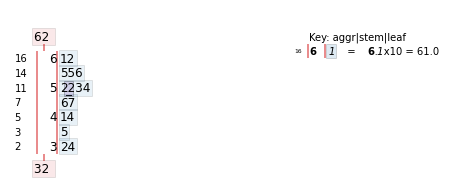

In [ ]:
x = [32, 34, 35, 41, 44, 46, 47, 52, 52, 53,54,55,55, 56, 61, 62]
import stemgraphic
fig, ax = stemgraphic.stem_graphic(x)

# Histograma
--- 
El histograma es una técnica gráfica utilizada para presentar gran cantidad de datos. Se le atribuye a Karl Pearson en 1895. El histograma puede ser: de frecuencias absolutas, de frecuencias relativas, de frecuencias absolutas acumuladas y de frecuencias relativas acumuladas. Para la construcción del histograma se requiere elaborar una tabla de distribución de frecuencias, lo cual se desarrollará a continuación.

El gráfico de la distribución de frecuencias, se llama histograma. El histograma de frecuencias es una representación visual de los datos en donde se evidencian fundamentalmente tres características: forma, acumulación o tendencia posicional y dispersión o variabilidad.

El histograma (de frecuencias) en si es una sucesión de rectángulos construidos sobre un sistema de coordenadas de la siguiente manera:

1. Las bases de los rectángulos se localizan en el eje horizontal. La longitud de la base es igual al ancho del intervalo.
2. Las alturas de los rectángulos se registran sobre el eje vertical y corresponden a las frecuencias de los intervalos.
3. Las áreas de los rectángulos son proporcionales a las frecuencias de las clases.

k=1+3.3log10(n)

In [ ]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



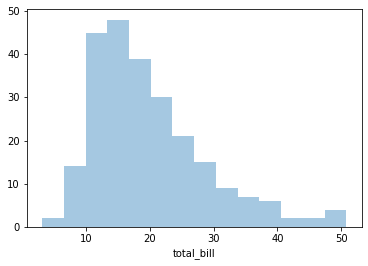

In [ ]:
sns.distplot(tips['total_bill'], kde=False) 
plt.show()

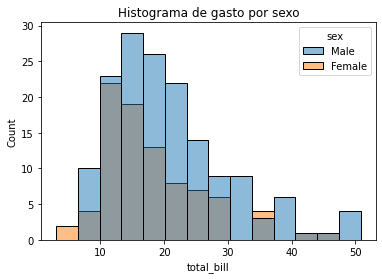

In [ ]:
sns.histplot(data=tips,x='total_bill',hue='sex') 
plt.title('Histograma de gasto por sexo')
plt.show()

In [ ]:
import plotly.express as px
df = px.data.tips()
fig = px.histogram(df, x="total_bill", nbins=10)
fig.update_layout(
    title="Comportamiento de total_bill",
    xaxis=dict(
        showgrid=False,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        tickfont_color='rgb(102, 102, 102)',
        showticklabels=True,
        dtick=10,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(l=140, r=40, b=50, t=80),
    legend=dict(
        font_size=10,
        yanchor='middle',
        xanchor='right',
    ),
    width=800,
    height=600,
    paper_bgcolor='white',
    plot_bgcolor='white',
    hovermode='closest',
)

# Series de tiempo (Lineplot)

In [6]:
df=pd.read_csv('accidents.csv',delimiter=";")
type(df)

pandas.core.frame.DataFrame

In [ ]:
print(df.shape)
df.head()

(18501, 24)


,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Unspecified,NaN,NaN,NaN,NaN,3988123.0,Sedan,NaN,NaN,NaN,NaN
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1.0,0.0,0.0,0.0,0.0,0.0,Unspecified,NaN,NaN,NaN,NaN,3987962.0,Sedan,NaN,NaN,NaN,NaN
2,08/22/2019,19:30,QUEENS,11101.0,40.755490,-73.939530,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Unspecified,NaN,NaN,NaN,NaN,4193132.0,Sedan,NaN,NaN,NaN,NaN
3,09/23/2018,13:10,QUEENS,11367.0,NaN,NaN,MAIN STREET,0.0,0.0,1.0,0.0,0.0,0.0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3985962.0,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.901270,NaN,0.0,0.0,0.0,0.0,1.0,0.0,View Obstructed/Limited,Unspecified,NaN,NaN,NaN,4192111.0,Sedan,Sedan,NaN,NaN,NaN


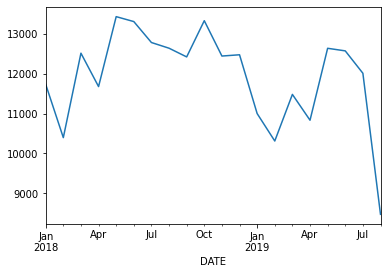

In [15]:
df['DATE']=pd.to_datetime(df['DATE'])
monthly_accidents =df.groupby(df['DATE'].dt.to_period('M')).size()
monthly_accidents.plot.line()

# Facetgrid

In [7]:
df

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,NaN,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3988123,Sedan,NaN,NaN,NaN,NaN
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3987962,Sedan,NaN,NaN,NaN,NaN
2,08/22/2019,19:30,QUEENS,11101.0,40.755490,-73.939530,NaN,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4193132,Sedan,NaN,NaN,NaN,NaN
3,09/23/2018,13:10,QUEENS,11367.0,NaN,NaN,MAIN STREET,0,0,1,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3985962,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.901270,NaN,0,0,0,0,1,0,View Obstructed/Limited,Unspecified,NaN,NaN,NaN,4192111,Sedan,Sedan,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238517,01/20/2018,15:00,QUEENS,11436.0,40.685356,-73.797230,LINDEN BOULEVARD,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3832275,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
238518,01/04/2018,14:00,BRONX,10452.0,40.845180,-73.914170,JEROME AVENUE,0,0,0,0,0,0,Pavement Slippery,NaN,NaN,NaN,NaN,3822315,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN
238519,01/20/2018,13:05,BRONX,10462.0,40.831210,-73.850876,CASTLE HILL AVENUE,0,0,0,0,0,0,Unsafe Lane Changing,Unspecified,NaN,NaN,NaN,3832513,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
238520,01/29/2018,17:45,QUEENS,11377.0,40.757250,-73.904854,31 AVENUE,0,0,0,0,2,0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,3837608,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


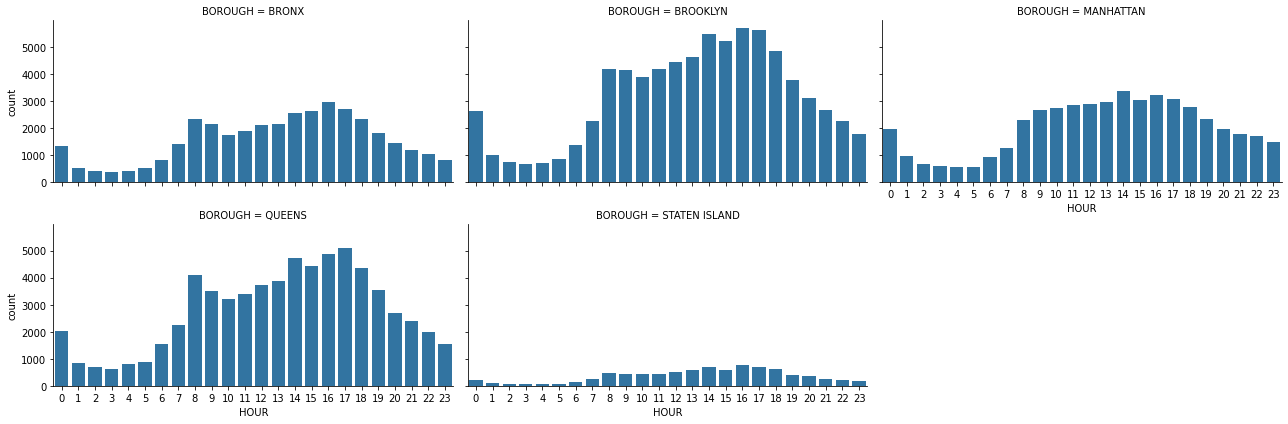

In [8]:
df['TIME']=pd.to_datetime(df['TIME'])
df['HOUR'] = df['TIME'].dt.hour

df1 = pd.DataFrame({'count': df.groupby(['BOROUGH', 'HOUR']).size()})
df1
df1 = df1.reset_index()
df1.head(10)

df1 = pd.DataFrame({'count': df.groupby(['BOROUGH', 'HOUR']).size()})
df1 = df1.reset_index()
chart = sns.FacetGrid(df1, col='BOROUGH', margin_titles=True, col_wrap=3, aspect=2, row_order=df['BOROUGH'].unique)
chart.map(sns.barplot, 'HOUR', 'count',)

In [9]:
df_prueba=df[['DATE','BOROUGH']]
pie_borough = df_prueba.groupby('BOROUGH').agg('count')
pie_borough=pie_borough.rename(columns={'DATE': 'Frecuencia'})
pie_borough

,Frecuencia
BOROUGH,
BRONX,37709
BROOKLYN,76253
MANHATTAN,48749
QUEENS,67120
STATEN ISLAND,8691


Index(['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND'], dtype='object', name='BOROUGH')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


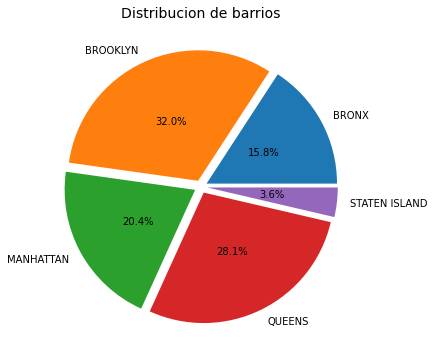

In [10]:
labels = pie_borough.index
print(labels)
pie, ax = plt.subplots(figsize=[10,6])
fig=plt.pie(x=pie_borough, autopct="%.1f%%",labels=labels,explode=[0.05]*5,\
            pctdistance=0.5)
plt.title("Distribucion de barrios", fontsize=14);

In [11]:
pie_borough

,Frecuencia
BOROUGH,
BRONX,37709
BROOKLYN,76253
MANHATTAN,48749
QUEENS,67120
STATEN ISLAND,8691


In [12]:
import plotly.express as px
fig = px.pie(pie_borough, values='Frecuencia', \
             names=pie_borough.index, title='Piechart Boroughs')
fig.show()

In [13]:
import plotly.express as px
fig = px.pie(pie_borough, values='Frecuencia', \
             names=pie_borough.index, title='Piechart Boroughs')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

# Medidas de tendencia central


---


# Media
x¯=∑ni=1xin 

Para el caso de datos discretos agrupados:

x¯=∑jxjfr(xj) 

Para datos agrupados en clases, la media se calcula suponiendo que todos los datos de cada clase son idénticos al centro de la clase, con lo que, llamando mj a estos valores centrales y fr (mj) a la frecuencia relativa de la clase j, la fórmula se reduce a:

x¯=∑jmjfr(mj) 

# Media geometrica
 Muy utilizada en lo que son tasas de interes y aspectos financieros

B=x1∗x2∗⋯∗xn−−−−−−−−−−−−−√ 

#Media armonica
 Se usa usualmente para calcular promedios espacio temporales

C=n∑ni=11xi 

#La media armonica
 siempre es la menor de las tres, la aritmetica la mayor y la geometrica un valor intermedio:

C < B < x¯ 


#Media recortada
 Es simplemente la media removiendo en la parte inferior y superior de los datos ordenados cierto porcentaje de los datos

#Mediana y moda
 La mediana es un valor tal que, ordenados en magnitud los datos, el 50% es menor que ella y el 50% mayor. Por tanto, al ordenar los datos sin agrupar, la mediana es el valor central, si su número es impar, o la media de los dos centrales, si hay un número par

Para datos agrupados discretos se toma como mediana el valor xm tal que
fr(x≤xa)< 0.5 
fr(x≤xb) >0.5 

La moda simplemente es el valor mas frecuente

In [16]:
monthly_accidents

DATE
2018-01    11735
2018-02    10395
2018-03    12519
2018-04    11679
2018-05    13438
2018-06    13314
2018-07    12787
2018-08    12644
2018-09    12425
2018-10    13336
2018-11    12447
2018-12    12479
2019-01    11000
2019-02    10310
2019-03    11482
2019-04    10833
2019-05    12642
2019-06    12577
2019-07    12014
2019-08     8466
Freq: M, dtype: int64

In [17]:
import scipy 
scipy.stats.describe(monthly_accidents)

DescribeResult(nobs=20, minmax=(8466, 13438), mean=11926.1, variance=1518605.3578947366, skewness=-1.160513548007565, kurtosis=1.140580420470969)

In [18]:
scipy.stats.gmean(monthly_accidents) # Media geometrica

11859.492451965642

In [19]:
scipy.stats.hmean(monthly_accidents) # Media armonica

11785.837775632142

In [20]:
scipy.stats.trim_mean(monthly_accidents,0.1) # Media recortada (Proporcion removida en cada cola 10%)

12060.75

In [21]:
scipy.stats.mode(monthly_accidents) # Moda

ModeResult(mode=array([8466]), count=array([1]))

# Medidas de dispersion


---


# Desviacion tipica

Promedio de las desviaciones de los datos respecto a la medida de centralización

s=∑ni=1(xi−x¯)2n−1−−−−−−−−−−−−√ 

Para datos agrupados es:

s=∑i=1n(xi−x¯)2fr(xi)−−−−−−−−−−−−−−−√ 

La información conjunta que proporcionan la media y la desviación típica puede precisarse de la siguiente forma: entre la media y k veces la desviación típica existe, como mínimo, el

100(1−1k2)% 

de las observaciones.

Para dos desviaciones tipicas:

100(1−122)%=75% 

A esto se conoce como la desigualdad de Tchebychev

#Coeficiente de variacion

El coeficiente de variación es una medida relativa de variabilidad. En ingeniería se utiliza mucho el coeficiente inverso, |x|s , que se conoce como coeficiente señal-ruido.

El coeficiente de variación en datos positivos de una población homogénea es típicamente menor que la unidad. Si este coeficiente es mayor que 1.5, conviene investigar posibles fuentes de heterogeneidad en los datos (medidas con distintos instrumentos; en personas de distinto sexo; en distintos momentos temporales, etc.).

#Mediana de las desviaciones absolutas
 La mediana de las desviaciones absolutas (MEDA) que tiene la ventaja, como la mediana, de no verse afectada por datos extremos.

MEDA=median|Xt−Mediana| 

#Rango
 Se denomina rango o recorrido de una variable la diferencia entre su valor máximo y mínimo

Rango=Max(X)−Min(X) 

Llamaremos **percentil** p al menor valor superior al  p  de los datos. Por ejemplo, si el número de datos es impar,la mediana es el percentil 50.

Llamaremos **cuartiles** a aquellos valores que dividen la distribución en cuatro partes iguales. El primer cuartil, Q1, es por definición igual al percentil 25, el segundo es la mediana y el tercero, Q3, el percentil 75, los percentiles y los cuartiles se utilizan para construir medidas de dispersión basadas en los datos ordenados, como el rango intercuartílico (IQR), que es la diferencia entre los percentiles 75 y 25.

IQR=P75−P25 

**Error estandar** Desviación estándar de la muestra dividida por la raíz cuadrada del tamaño de la muestra (suponiendo la independencia estadística de los valores de la muestra).

SE=σn−−√

In [22]:
scipy.stats.describe(monthly_accidents) # Calcular el coeficiente de variacion

DescribeResult(nobs=20, minmax=(8466, 13438), mean=11926.1, variance=1518605.3578947366, skewness=-1.160513548007565, kurtosis=1.140580420470969)

In [23]:
scipy.stats.variation(monthly_accidents) # Calcular el coeficiente de variacion

0.10071306660647113

In [24]:
scipy.stats.iqr(monthly_accidents) # Calcular el IQR

1281.0

In [25]:
scipy.stats.sem(monthly_accidents) # Calcular el Error estandar

275.5544735523937

#Medidas de asimetria y kurtosis


---


Estas medidas informan sobre dos aspectos importantes de la forma de la distribución: su grado de asimetría y su grado de homogeneidad. Al ser medidas de forma, no dependen de las unidades de medida de los datos

**Asimetria** En un conjunto de datos simétricos respecto a su media  x¯ , la suma  ∑(x−x¯)3  será nula, mientras que con datos asimétricos esta suma crecerá con la asimetría. Para obtener una medida adimensional, se define el coeficiente de asimetría mediante:

CA=∑ni=1(xi−x¯)3ns3 

Donde s es la desviación típica.

El signo del coeficiente de asimetría indica la forma de la distribución.

1. Si este coeficiente es negativo, la distribución se alarga para valores inferiores a la media

2. Si el coeficiente es positivo, la cola de la distribución se extiende para valores superiores a la media



**Kurtosis** es una característica de como la frecuencia relativa se reparte entre el centro y los extremos

CAp=∑ni=1(xi−x¯)4ns4 

Este coeficiente es siempre mayor o igual que uno. El coeficiente de curtosis es importante porque nos informa respecto a la heterogeneidad de la distribución.

1. Si es muy bajo (menor de 2), indica una distribución mezclada
2. si es muy alto (mayor de 6), indica la presencia de valores extremos atípicos.

In [26]:
scipy.stats.skew(monthly_accidents) # Calcular el CA

-1.160513548007565

In [27]:
scipy.stats.kurtosis(monthly_accidents) # Calcular el CA_p

1.140580420470969

(array([1., 0., 0., 2., 1., 1., 3., 2., 7., 3.]),
 array([ 8466. ,  8963.2,  9460.4,  9957.6, 10454.8, 10952. , 11449.2,
        11946.4, 12443.6, 12940.8, 13438. ]),
 <a list of 10 Patch objects>)

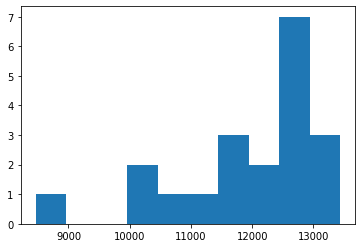

In [28]:
plt.hist(monthly_accidents)

#Datos atipicos


---


Es muy frecuente que los datos presenten observaciones que contienen errores de medida o de transcripción o que son heterogéneas con el resto porque se han obtenido en circunstancias distintas. Llamaremos datos atípicos a estas observaciones generadas de forma distinta al resto de los datos.

De muchos estudios se ha demostrado que esta proporcion puede variar entre un 1 y un 3% de una muestra. Incluso puede ser >5% si no hay cuidado en la recoleccion

#Como detectarlos?

1. Un criterio simple es observaciones alejadas de la media más de tres desviaciones típicas. Debido a que entre la media y tres desviaciones típicas debe estar al menos el 89% de los datos. Un problema con esta regla es que si existen varios valores atípicos muy grandes que distorsionan la media y la desviación típica, es posible que los datos atípicos no sean identificados

2. Una regla mejor es utilizar valores de centralización y dispersión que estén poco afectados por valores atípicos, como la mediana y la Meda, pero presenta el inconveniente de no tener en cuenta la asimetría de la distribución

x>Med±4.5∗MEDA 

3. Usando el rango intercuartilico
x < Q1−1.5IQR 
x>Q3+1.5IQR 

**OJO:**  no siempre se deben eleminar los datos atipicos, a veces estos datos dicen mucho en un analisis descriptivo

Para detectar atipicos se suele usar el diagrama de caja o boxplot

Text(0.5, 0, 'Accidentes')

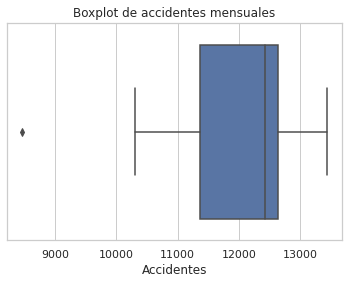

In [29]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=monthly_accidents)
plt.title('Boxplot de accidentes mensuales')
plt.xlabel('Accidentes')

In [30]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Text(0.5, 0, 'Accidentes')

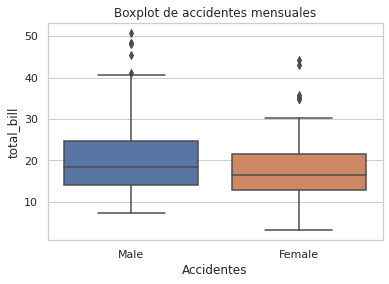

In [31]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(y=tips.total_bill, x=tips.sex)
plt.title('Boxplot de accidentes mensuales')
plt.xlabel('Accidentes')

In [32]:
import plotly.express as px
fig = px.box(tips, x="sex", y="total_bill")
fig.show()

In [33]:
fig = px.box(tips, x="day", y="total_bill", color="smoker")
fig.show()

# Transformaciones lineales

Tienen la forma:
y=mx+b

#tranformaciones no lineales

#Transformacion de Box-Cox

La familia de transformaciones de Box-Cox arregla problemas de normalidad y heterocedasticidad (no homogeneidad de varianzas). Suponga que tenemos los datos  y1,y2,…,yn  para una variable respuesta  Y . Si el cociente entre el valor más grande observado de  Y  y la más pequeña es considerablemente grande, por decir, 10 o más, se debe considerar la posibilidad de transformar la variable respuesta  Y .

W=Yλ−1λ,λ≠0 

W=ln(Y),λ=0

In [34]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


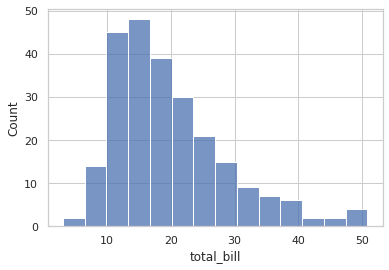

In [35]:
sns.histplot(tips.total_bill)

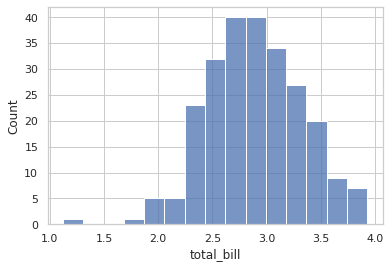

In [36]:
import numpy as np
sns.histplot(np.log(tips.total_bill))

#Descripcion conjunta de varias variables
**Distribucion conjunta** Llamaremos distribución conjunta de frecuencias de dos variables (x, y) a una tabla que representa los valores observados de ambas variables y las frecuencias relativas de aparición de cada par de valores

In [37]:
df=pd.read_csv('accidents.csv',delimiter=";")
df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,NaN,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3988123,Sedan,NaN,NaN,NaN,NaN
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3987962,Sedan,NaN,NaN,NaN,NaN
2,08/22/2019,19:30,QUEENS,11101.0,40.755490,-73.939530,NaN,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4193132,Sedan,NaN,NaN,NaN,NaN
3,09/23/2018,13:10,QUEENS,11367.0,NaN,NaN,MAIN STREET,0,0,1,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3985962,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.901270,NaN,0,0,0,0,1,0,View Obstructed/Limited,Unspecified,NaN,NaN,NaN,4192111,Sedan,Sedan,NaN,NaN,NaN


In [38]:
data_crosstab = pd.crosstab(df['BOROUGH'],
                            df['CONTRIBUTING FACTOR VEHICLE 1'], 
                               margins = True)
data_crosstab

CONTRIBUTING FACTOR VEHICLE 1,Accelerator Defective,Aggressive Driving/Road Rage,Alcohol Involvement,Animals Action,Backing Unsafely,Brakes Defective,Cell Phone (hand-Held),Cell Phone (hands-free),Driver Inattention/Distraction,Driver Inexperience,Driverless/Runaway Vehicle,Drugs (illegal),Eating or Drinking,Failure to Keep Right,Failure to Yield Right-of-Way,Fatigued/Drowsy,Fell Asleep,Following Too Closely,Glare,Headlights Defective,Illnes,Lane Marking Improper/Inadequate,Listening/Using Headphones,Lost Consciousness,Obstruction/Debris,Other Electronic Device,Other Lighting Defects,Other Vehicular,Outside Car Distraction,Oversized Vehicle,Passenger Distraction,Passing Too Closely,Passing or Lane Usage Improper,Pavement Defective,Pavement Slippery,Pedestrian/Bicyclist/Other Pedestrian Error/Confusion,Physical Disability,Prescription Medication,Reaction to Uninvolved Vehicle,Shoulders Defective/Improper,Steering Failure,Texting,Tinted Windows,Tire Failure/Inadequate,Tow Hitch Defective,Traffic Control Device Improper/Non-Working,Traffic Control Disregarded,Turning Improperly,Unsafe Lane Changing,Unsafe Speed,Unspecified,Using On Board Navigation Device,Vehicle Vandalism,View Obstructed/Limited,Windshield Inadequate,All
BOROUGH,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BRONX,16,231,421,28,2309,165,23,2,6280,531,57,21,1,46,2190,42,93,2194,102,2,42,22,0,28,76,7,5,2315,85,240,113,2035,1388,36,353,321,9,8,420,4,64,1,6,36,5,18,750,1177,1002,602,11175,3,4,423,1,37528
BROOKLYN,49,312,790,40,4150,277,23,4,17111,1252,66,34,8,78,5914,56,200,4636,104,2,90,37,2,65,120,9,15,1770,141,567,257,3858,3087,113,501,484,16,4,819,0,107,4,6,80,10,31,1302,1629,1317,926,22766,4,10,682,3,75938
MANHATTAN,15,189,302,14,2135,108,12,2,14045,926,40,19,1,76,2389,26,53,3348,46,0,31,32,0,22,100,5,3,1898,119,605,450,2560,2923,60,207,465,4,3,565,3,31,3,2,18,4,18,593,1270,2370,284,9864,3,3,349,1,48614
QUEENS,48,225,731,54,4618,210,21,0,18816,958,52,22,1,78,6984,70,204,4447,128,7,69,33,1,62,86,5,7,1273,112,292,124,2604,2774,70,550,236,20,2,841,2,85,2,1,65,6,19,1484,1703,1104,865,14127,6,4,592,1,66901
STATEN ISLAND,10,37,138,46,664,52,2,0,2299,132,12,18,2,30,759,11,38,745,36,0,14,4,0,23,30,2,1,253,30,36,16,280,297,12,194,39,8,2,141,0,26,1,2,18,0,5,191,264,139,151,1375,0,1,71,0,8657
All,138,994,2382,182,13876,812,81,8,58551,3799,227,114,13,308,18236,205,588,15370,416,11,246,128,3,200,412,28,31,7509,487,1740,960,11337,10469,291,1805,1545,57,19,2786,9,313,11,17,217,25,91,4320,6043,5932,2828,59307,16,22,2117,6,237638


In [39]:
columnas=list(data_crosstab.iloc[5, :].nlargest(n=11).index)
type(columnas)
columnas.remove('All')
columnas

['Unspecified',
 'Driver Inattention/Distraction',
 'Failure to Yield Right-of-Way',
 'Following Too Closely',
 'Backing Unsafely',
 'Passing Too Closely',
 'Passing or Lane Usage Improper',
 'Other Vehicular',
 'Turning Improperly',
 'Unsafe Lane Changing']

In [40]:
data_crosstab_n=data_crosstab[columnas]/1000 # Normalizar a miles 
data_crosstab_n=data_crosstab_n[0:4]
data_crosstab_n

CONTRIBUTING FACTOR VEHICLE 1,Unspecified,Driver Inattention/Distraction,Failure to Yield Right-of-Way,Following Too Closely,Backing Unsafely,Passing Too Closely,Passing or Lane Usage Improper,Other Vehicular,Turning Improperly,Unsafe Lane Changing
BOROUGH,,,,,,,,,,
BRONX,11.175,6.280,2.190,2.194,2.309,2.035,1.388,2.315,1.177,1.002
BROOKLYN,22.766,17.111,5.914,4.636,4.150,3.858,3.087,1.770,1.629,1.317
MANHATTAN,9.864,14.045,2.389,3.348,2.135,2.560,2.923,1.898,1.270,2.370
QUEENS,14.127,18.816,6.984,4.447,4.618,2.604,2.774,1.273,1.703,1.104


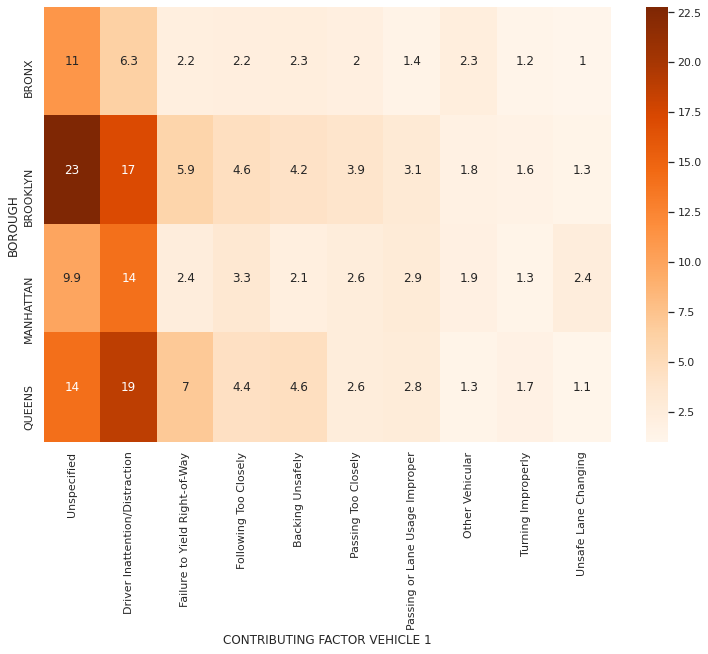

In [41]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12.7,8
import seaborn as sns
sns.heatmap(data_crosstab_n, annot=True,cmap='Oranges')

In [42]:
import numpy as np
data_crosstab_N = np.round(pd.crosstab(df['BOROUGH'],
                            df['CONTRIBUTING FACTOR VEHICLE 1'], 
                               margins = True,normalize=True)*100,2)
data_crosstab_N

columnas=list(data_crosstab_N.iloc[5, :].nlargest(n=11).index)
type(columnas)
columnas.remove('All')

data_crosstab_N=data_crosstab_N[columnas] # Normalizar a miles 
data_crosstab_N=np.round(data_crosstab_N[0:4],2)
data_crosstab_N

CONTRIBUTING FACTOR VEHICLE 1,Unspecified,Driver Inattention/Distraction,Failure to Yield Right-of-Way,Following Too Closely,Backing Unsafely,Passing Too Closely,Passing or Lane Usage Improper,Other Vehicular,Turning Improperly,Unsafe Lane Changing
BOROUGH,,,,,,,,,,
BRONX,4.70,2.64,0.92,0.92,0.97,0.86,0.58,0.97,0.50,0.42
BROOKLYN,9.58,7.20,2.49,1.95,1.75,1.62,1.30,0.74,0.69,0.55
MANHATTAN,4.15,5.91,1.01,1.41,0.90,1.08,1.23,0.80,0.53,1.00
QUEENS,5.94,7.92,2.94,1.87,1.94,1.10,1.17,0.54,0.72,0.46


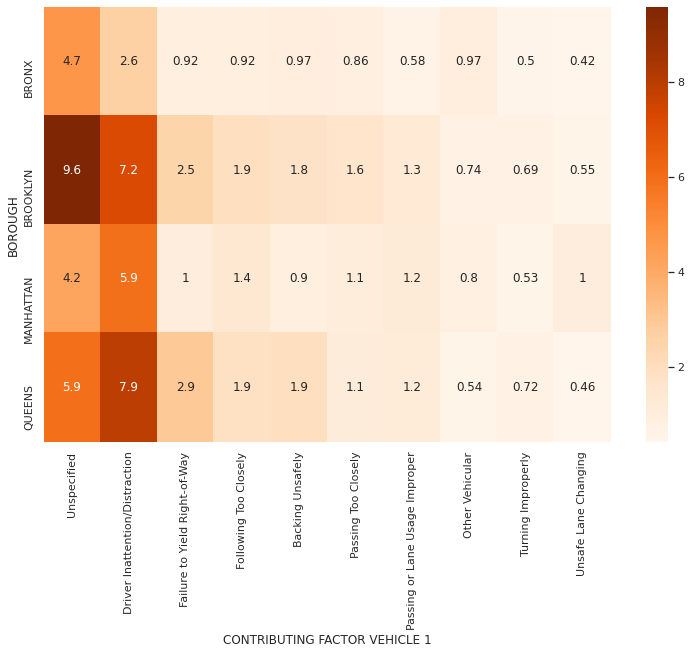

In [43]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12.7,8
import seaborn as sns
sns.heatmap(data_crosstab_N, annot=True,cmap='Oranges')

In [44]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [45]:
import plotly.express as px
df = px.data.iris() # iris is a pandas DataFrame
fig = px.scatter(tips, x="tip", y="total_bill")
fig.show()

# Medidas de dependencia Lineal

Cov(x,y)=∑ni=1(x−x¯)(y−y¯)n 

La covarianza fue introducida por K. Pearson para medir la relación lineal entre x e y.

In [46]:
np.cov(tips.total_bill,tips.tip)

array([[79.25293861,  8.32350163],
       [ 8.32350163,  1.91445464]])

# Correlacion
r=Cov(x,y)sxsy 

donde  sx  y  sy  son las desviaciones típicas de x y de y. Deben saber que

1. El coeficiente de correlación tiene el mismo signo que la covarianza.
2. El coeficiente de correlación es adimensional: su valor no varía si multiplicamos x por k1 e y por k2, siendo k1 y k2 números no nulos del mismo signo.
4. Si existe una relación lineal exacta entre ambas variables, lo que supone que todos los puntos deben estar en una línea recta, que podemos escribir como y = a + bx, el coeficiente de correlación es igual a 1 (si b > 0) o –1 (si b < 0).
5. Si no existe una relación lineal exacta (los puntos no están sobre una recta), –1 < r < 1.

In [ ]:
from scipy.stats import pearsonr
pearsonr(ps.total_tips.tip,tibill)